In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('api_keys.env')

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [10]:
# Import alpaca-py as alpaca
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoLatestQuoteRequest, CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime

In [11]:
# Declaring variable for client
client = CryptoHistoricalDataClient()

In [12]:
# Setting up params for request
request_params = CryptoLatestQuoteRequest(symbol_or_symbols="BTC/USD")

In [13]:
# Grabbing latest price with client
latest_quote = client.get_crypto_latest_quote(request_params)

In [14]:
# must use symbol to access even though it is single symbol
latest_quote["BTC/USD"].ask_price

18835.74

In [15]:
# Updating params for historical price data
request_params = CryptoBarsRequest(
                        symbol_or_symbols=["BTC/USD"],
                        timeframe=TimeFrame.Day,
                        start=datetime.strptime("2020-04-01", '%Y-%m-%d')
                        )

In [16]:
# Grabbing historical data
bars = client.get_crypto_bars(request_params)

In [17]:
# convert to dataframe
bars.df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-01-08 06:00:00+00:00  16935.27  17248.53  16910.00  17196.67   
        2023-01-09 06:00:00+00:00  17198.94  17387.05  17126.73  17221.37   
        2023-01-10 06:00:00+00:00  17221.10  17500.00  17182.07  17402.92   
        2023-01-11 06:00:00+00:00  17401.42  18350.00  17312.68  18079.38   
        2023-01-12 06:00:00+00:00  18079.40  19109.28  17919.62  18834.83   

                                         volume  trade_count          vwap  
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00      0.000100          1.0   7314.000000  
        2020-04-14 05:00:00+00:00      0.000200          2.0   7100.750000  
        2020-04-22 05:00:00+00:00      0.000100          1.0   7118.500000  
        2020-04-28 05:00:00+00:00      0.084000          2.0   7835.687500  
        2020-04-30 05:00:00+00:00      0.013400          3.0   8715.805970  
...                                         ...          ...           ...  
        2023-01-08 06:00:00+00:00   4780.862636      60160.0  17095.062466  
        2023-01-09 06:00:00+00:00   6368.736182      88983.0  17245.549935  
        2023-01-10 06:00:00+00:00   7089.683228      85482.0  17355.307832  
        2023-01-11 06:00:00+00:00  11652.868871     130476.0  17807.792543  
        2023-01-12 06:00:00+00:00  17258.441671     195556.0  18410.393449  

[980 rows x 7 columns]

In [18]:
# Setting as dataframe variable
btc_df = bars.df
btc_df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-01-08 06:00:00+00:00  16935.27  17248.53  16910.00  17196.67   
        2023-01-09 06:00:00+00:00  17198.94  17387.05  17126.73  17221.37   
        2023-01-10 06:00:00+00:00  17221.10  17500.00  17182.07  17402.92   
        2023-01-11 06:00:00+00:00  17401.42  18350.00  17312.68  18079.38   
        2023-01-12 06:00:00+00:00  18079.40  19109.28  17919.62  18834.83   

                                         volume  trade_count          vwap  
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00      0.000100          1.0   7314.000000  
        2020-04-14 05:00:00+00:00      0.000200          2.0   7100.750000  
        2020-04-22 05:00:00+00:00      0.000100          1.0   7118.500000  
        2020-04-28 05:00:00+00:00      0.084000          2.0   7835.687500  
        2020-04-30 05:00:00+00:00      0.013400          3.0   8715.805970  
...                                         ...          ...           ...  
        2023-01-08 06:00:00+00:00   4780.862636      60160.0  17095.062466  
        2023-01-09 06:00:00+00:00   6368.736182      88983.0  17245.549935  
        2023-01-10 06:00:00+00:00   7089.683228      85482.0  17355.307832  
        2023-01-11 06:00:00+00:00  11652.868871     130476.0  17807.792543  
        2023-01-12 06:00:00+00:00  17258.441671     195556.0  18410.393449  

[980 rows x 7 columns]

In [19]:
# Checking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 980 entries, ('BTC/USD', Timestamp('2020-04-08 05:00:00+0000', tz='UTC')) to ('BTC/USD', Timestamp('2023-01-12 06:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         980 non-null    float64
 1   high         980 non-null    float64
 2   low          980 non-null    float64
 3   close        980 non-null    float64
 4   volume       980 non-null    float64
 5   trade_count  980 non-null    float64
 6   vwap         980 non-null    float64
dtypes: float64(7)
memory usage: 96.6+ KB


In [20]:
# Reset index to access symbol and timestamp as columns
btc_df = btc_df.reset_index()
btc_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,BTC/USD,2020-04-08 05:00:00+00:00,7314.00,7314.00,7314.00,7314.00,0.000100,1.0,7314.000000
1,BTC/USD,2020-04-14 05:00:00+00:00,7101.50,7101.50,7100.00,7100.00,0.000200,2.0,7100.750000
2,BTC/USD,2020-04-22 05:00:00+00:00,7118.50,7118.50,7118.50,7118.50,0.000100,1.0,7118.500000
3,BTC/USD,2020-04-28 05:00:00+00:00,7748.50,7836.00,7748.50,7836.00,0.084000,2.0,7835.687500
4,BTC/USD,2020-04-30 05:00:00+00:00,8829.00,8829.00,8653.00,8653.00,0.013400,3.0,8715.805970
...,...,...,...,...,...,...,...,...,...
975,BTC/USD,2023-01-08 06:00:00+00:00,16935.27,17248.53,16910.00,17196.67,4780.862636,60160.0,17095.062466
976,BTC/USD,2023-01-09 06:00:00+00:00,17198.94,17387.05,17126.73,17221.37,6368.736182,88983.0,17245.549935
977,BTC/USD,2023-01-10 06:00:00+00:00,17221.10,17500.00,17182.07,17402.92,7089.683228,85482.0,17355.307832
978,BTC/USD,2023-01-11 06:00:00+00:00,17401.42,18350.00,17312.68,18079.38,11652.868871,130476.0,17807.792543


In [21]:
# Revising time out of timestamp column
import datetime as dt
btc_df['timestamp'] = btc_df['timestamp'].dt.date
btc_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,BTC/USD,2020-04-08,7314.00,7314.00,7314.00,7314.00,0.000100,1.0,7314.000000
1,BTC/USD,2020-04-14,7101.50,7101.50,7100.00,7100.00,0.000200,2.0,7100.750000
2,BTC/USD,2020-04-22,7118.50,7118.50,7118.50,7118.50,0.000100,1.0,7118.500000
3,BTC/USD,2020-04-28,7748.50,7836.00,7748.50,7836.00,0.084000,2.0,7835.687500
4,BTC/USD,2020-04-30,8829.00,8829.00,8653.00,8653.00,0.013400,3.0,8715.805970
...,...,...,...,...,...,...,...,...,...
975,BTC/USD,2023-01-08,16935.27,17248.53,16910.00,17196.67,4780.862636,60160.0,17095.062466
976,BTC/USD,2023-01-09,17198.94,17387.05,17126.73,17221.37,6368.736182,88983.0,17245.549935
977,BTC/USD,2023-01-10,17221.10,17500.00,17182.07,17402.92,7089.683228,85482.0,17355.307832
978,BTC/USD,2023-01-11,17401.42,18350.00,17312.68,18079.38,11652.868871,130476.0,17807.792543


In [23]:
# Setting up pivot to get subset of closing prices
btc_pivot = btc_df.pivot_table(values='close', index='timestamp', columns='symbol')
btc_pivot

symbol,BTC/USD
timestamp,
2020-04-08,7314.00
2020-04-14,7100.00
2020-04-22,7118.50
2020-04-28,7836.00
2020-04-30,8653.00
...,...
2023-01-08,17196.67
2023-01-09,17221.37
2023-01-10,17402.92


In [24]:
# Checking for nulls
btc_pivot.isnull().sum()

symbol
BTC/USD    0
dtype: int64

In [25]:
# Running percentage change calculation and conversion
btc_daily = btc_pivot.pct_change()
btc_daily

symbol,BTC/USD
timestamp,
2020-04-08,NaN
2020-04-14,-0.029259
2020-04-22,0.002606
2020-04-28,0.100794
2020-04-30,0.104262
...,...
2023-01-08,0.015391
2023-01-09,0.001436
2023-01-10,0.010542


In [26]:
# Recheck nulls
btc_daily.isnull().sum()

symbol
BTC/USD    1
dtype: int64

In [27]:
# Drop nulls
btc_daily = btc_daily.dropna()
btc_daily

symbol,BTC/USD
timestamp,
2020-04-14,-0.029259
2020-04-22,0.002606
2020-04-28,0.100794
2020-04-30,0.104262
2020-05-01,0.018895
...,...
2023-01-08,0.015391
2023-01-09,0.001436
2023-01-10,0.010542


In [28]:
# Checking info
btc_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, 2020-04-14 to 2023-01-12
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC/USD  979 non-null    float64
dtypes: float64(1)
memory usage: 15.3+ KB


In [29]:
# Setting up dependencies for stock price data
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest

In [30]:
# keys required for stock historical data client
stock_client = StockHistoricalDataClient(alpaca_api_key, alpaca_secret_key)

In [31]:
# params request for multiple tickers
multisymbol_request_params = StockBarsRequest(symbol_or_symbols=["SPY", "GLD", "TLT"],
                                              timeframe=TimeFrame.Day, 
                                              start=datetime.strptime("2020-04-08", '%Y-%m-%d')
                                             )

In [32]:
# pulling data
historical_quotes = stock_client.get_stock_bars(multisymbol_request_params)

In [34]:
# Display as dataframe
historical_quotes.df

open    high       low   close  \
symbol timestamp                                                     
GLD    2020-04-08 04:00:00+00:00  155.91  155.94  154.5900  154.65   
       2020-04-09 04:00:00+00:00  158.08  159.08  157.2100  158.58   
       2020-04-13 04:00:00+00:00  159.17  162.38  158.6250  161.41   
       2020-04-14 04:00:00+00:00  162.73  164.42  161.7800  162.66   
       2020-04-15 04:00:00+00:00  161.80  162.54  160.8061  162.00   
...                                  ...     ...       ...     ...   
TLT    2023-01-06 05:00:00+00:00  102.70  105.30  102.6400  105.18   
       2023-01-09 05:00:00+00:00  104.41  105.93  104.2700  105.74   
       2023-01-10 05:00:00+00:00  104.53  104.82  103.5000  103.99   
       2023-01-11 05:00:00+00:00  104.97  105.72  104.7000  105.68   
       2023-01-12 05:00:00+00:00  105.82  107.81  104.5600  107.76   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-01-06 05:00:00+00:00  27473733.0     154552.0  104.640157  
       2023-01-09 05:00:00+00:00  21589615.0     117697.0  105.338908  
       2023-01-10 05:00:00+00:00  20546925.0     132695.0  104.052210  
       2023-01-11 05:00:00+00:00  18794029.0     106973.0  105.209779  
       2023-01-12 05:00:00+00:00  32030608.0     175171.0  106.745055  

[2091 rows x 7 columns]

In [35]:
# Save as df variable
stock_df = historical_quotes.df
stock_df

open    high       low   close  \
symbol timestamp                                                     
GLD    2020-04-08 04:00:00+00:00  155.91  155.94  154.5900  154.65   
       2020-04-09 04:00:00+00:00  158.08  159.08  157.2100  158.58   
       2020-04-13 04:00:00+00:00  159.17  162.38  158.6250  161.41   
       2020-04-14 04:00:00+00:00  162.73  164.42  161.7800  162.66   
       2020-04-15 04:00:00+00:00  161.80  162.54  160.8061  162.00   
...                                  ...     ...       ...     ...   
TLT    2023-01-06 05:00:00+00:00  102.70  105.30  102.6400  105.18   
       2023-01-09 05:00:00+00:00  104.41  105.93  104.2700  105.74   
       2023-01-10 05:00:00+00:00  104.53  104.82  103.5000  103.99   
       2023-01-11 05:00:00+00:00  104.97  105.72  104.7000  105.68   
       2023-01-12 05:00:00+00:00  105.82  107.81  104.5600  107.76   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-01-06 05:00:00+00:00  27473733.0     154552.0  104.640157  
       2023-01-09 05:00:00+00:00  21589615.0     117697.0  105.338908  
       2023-01-10 05:00:00+00:00  20546925.0     132695.0  104.052210  
       2023-01-11 05:00:00+00:00  18794029.0     106973.0  105.209779  
       2023-01-12 05:00:00+00:00  32030608.0     175171.0  106.745055  

[2091 rows x 7 columns]

In [36]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2091 entries, ('GLD', Timestamp('2020-04-08 04:00:00+0000', tz='UTC')) to ('TLT', Timestamp('2023-01-12 05:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         2091 non-null   float64
 1   high         2091 non-null   float64
 2   low          2091 non-null   float64
 3   close        2091 non-null   float64
 4   volume       2091 non-null   float64
 5   trade_count  2091 non-null   float64
 6   vwap         2091 non-null   float64
dtypes: float64(7)
memory usage: 142.3+ KB


In [37]:
# Reset index to access symbol and timestamp as columns
stock_df = stock_df.reset_index()
stock_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,GLD,2020-04-08 04:00:00+00:00,155.91,155.94,154.5900,154.65,7600804.0,60704.0,155.233884
1,GLD,2020-04-09 04:00:00+00:00,158.08,159.08,157.2100,158.58,18123039.0,140239.0,158.255634
2,GLD,2020-04-13 04:00:00+00:00,159.17,162.38,158.6250,161.41,20549213.0,140401.0,160.906373
3,GLD,2020-04-14 04:00:00+00:00,162.73,164.42,161.7800,162.66,17095086.0,146336.0,163.197557
4,GLD,2020-04-15 04:00:00+00:00,161.80,162.54,160.8061,162.00,12141890.0,95518.0,161.749049
...,...,...,...,...,...,...,...,...,...
2086,TLT,2023-01-06 05:00:00+00:00,102.70,105.30,102.6400,105.18,27473733.0,154552.0,104.640157
2087,TLT,2023-01-09 05:00:00+00:00,104.41,105.93,104.2700,105.74,21589615.0,117697.0,105.338908
2088,TLT,2023-01-10 05:00:00+00:00,104.53,104.82,103.5000,103.99,20546925.0,132695.0,104.052210
2089,TLT,2023-01-11 05:00:00+00:00,104.97,105.72,104.7000,105.68,18794029.0,106973.0,105.209779


In [38]:
# Revising time out of timestamp column
stock_df['timestamp'] = stock_df['timestamp'].dt.date
stock_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,GLD,2020-04-08,155.91,155.94,154.5900,154.65,7600804.0,60704.0,155.233884
1,GLD,2020-04-09,158.08,159.08,157.2100,158.58,18123039.0,140239.0,158.255634
2,GLD,2020-04-13,159.17,162.38,158.6250,161.41,20549213.0,140401.0,160.906373
3,GLD,2020-04-14,162.73,164.42,161.7800,162.66,17095086.0,146336.0,163.197557
4,GLD,2020-04-15,161.80,162.54,160.8061,162.00,12141890.0,95518.0,161.749049
...,...,...,...,...,...,...,...,...,...
2086,TLT,2023-01-06,102.70,105.30,102.6400,105.18,27473733.0,154552.0,104.640157
2087,TLT,2023-01-09,104.41,105.93,104.2700,105.74,21589615.0,117697.0,105.338908
2088,TLT,2023-01-10,104.53,104.82,103.5000,103.99,20546925.0,132695.0,104.052210
2089,TLT,2023-01-11,104.97,105.72,104.7000,105.68,18794029.0,106973.0,105.209779


In [39]:
# Subset of SPY only
loc_df = stock_df.loc[(stock_df.symbol == 'SPY'), :]
loc_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
697,SPY,2020-04-08,267.96,276.0000,265.2542,274.00,153774487.0,950859.0,271.051454
698,SPY,2020-04-09,277.58,281.2000,275.4700,278.22,190283195.0,1171999.0,278.251697
699,SPY,2020-04-13,277.14,277.5100,271.4100,275.63,114868253.0,752225.0,274.512847
700,SPY,2020-04-14,280.98,284.9000,275.5106,283.80,134143470.0,761246.0,282.089774
701,SPY,2020-04-15,277.57,283.9407,275.4600,277.75,121779042.0,711140.0,277.826041
...,...,...,...,...,...,...,...,...,...
1389,SPY,2023-01-06,382.61,389.2500,379.4127,388.08,103741286.0,683816.0,385.248218
1390,SPY,2023-01-09,390.37,393.7000,387.6700,387.86,73999806.0,550008.0,390.361862
1391,SPY,2023-01-10,387.25,390.6500,386.2700,390.58,65367664.0,472370.0,389.082150
1392,SPY,2023-01-11,392.23,395.6000,391.3800,395.52,68881080.0,452704.0,393.300096


In [40]:
# Pivot for SPY
spy_pivot = loc_df.pivot_table(values='close', index='timestamp', columns='symbol')
spy_pivot

symbol,SPY
timestamp,
2020-04-08,274.00
2020-04-09,278.22
2020-04-13,275.63
2020-04-14,283.80
2020-04-15,277.75
...,...
2023-01-06,388.08
2023-01-09,387.86
2023-01-10,390.58


In [41]:
# Checking info
spy_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 697 entries, 2020-04-08 to 2023-01-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     697 non-null    float64
dtypes: float64(1)
memory usage: 10.9+ KB


In [42]:
# Running percentage change calculation and conversion
spy_daily = spy_pivot.pct_change()
spy_daily

symbol,SPY
timestamp,
2020-04-08,NaN
2020-04-09,0.015401
2020-04-13,-0.009309
2020-04-14,0.029641
2020-04-15,-0.021318
...,...
2023-01-06,0.022932
2023-01-09,-0.000567
2023-01-10,0.007013


In [43]:
# Dropping nulls
spy_daily = spy_daily.dropna()
spy_daily

symbol,SPY
timestamp,
2020-04-09,0.015401
2020-04-13,-0.009309
2020-04-14,0.029641
2020-04-15,-0.021318
2020-04-16,0.004356
...,...
2023-01-06,0.022932
2023-01-09,-0.000567
2023-01-10,0.007013


In [44]:
# Subset of GLD only
gld_df = stock_df.loc[(stock_df.symbol == 'GLD'), :]
gld_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,GLD,2020-04-08,155.91,155.940,154.5900,154.65,7600804.0,60704.0,155.233884
1,GLD,2020-04-09,158.08,159.080,157.2100,158.58,18123039.0,140239.0,158.255634
2,GLD,2020-04-13,159.17,162.380,158.6250,161.41,20549213.0,140401.0,160.906373
3,GLD,2020-04-14,162.73,164.420,161.7800,162.66,17095086.0,146336.0,163.197557
4,GLD,2020-04-15,161.80,162.540,160.8061,162.00,12141890.0,95518.0,161.749049
...,...,...,...,...,...,...,...,...,...
692,GLD,2023-01-06,171.76,173.960,171.2300,173.71,7869149.0,58721.0,173.208524
693,GLD,2023-01-09,174.51,175.035,173.8810,174.10,5134804.0,39209.0,174.306650
694,GLD,2023-01-10,174.61,174.980,174.0600,174.74,4399085.0,34663.0,174.581799
695,GLD,2023-01-11,174.76,174.790,173.7200,174.62,3374201.0,29344.0,174.440074


In [45]:
# Pivot for GLD
gld_pivot = gld_df.pivot_table(values='close', index='timestamp', columns='symbol')
gld_pivot

symbol,GLD
timestamp,
2020-04-08,154.65
2020-04-09,158.58
2020-04-13,161.41
2020-04-14,162.66
2020-04-15,162.00
...,...
2023-01-06,173.71
2023-01-09,174.10
2023-01-10,174.74


In [46]:
# Checking info
gld_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 697 entries, 2020-04-08 to 2023-01-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     697 non-null    float64
dtypes: float64(1)
memory usage: 10.9+ KB


In [47]:
# Running percentage change calculation and conversion
gld_daily = gld_pivot.pct_change()
gld_daily

symbol,GLD
timestamp,
2020-04-08,NaN
2020-04-09,0.025412
2020-04-13,0.017846
2020-04-14,0.007744
2020-04-15,-0.004058
...,...
2023-01-06,0.018707
2023-01-09,0.002245
2023-01-10,0.003676


In [48]:
# Dropping nulls
gld_daily = gld_daily.dropna()
gld_daily

symbol,GLD
timestamp,
2020-04-09,0.025412
2020-04-13,0.017846
2020-04-14,0.007744
2020-04-15,-0.004058
2020-04-16,-0.001790
...,...
2023-01-06,0.018707
2023-01-09,0.002245
2023-01-10,0.003676


In [49]:
# Subset of TLT only
tlt_df = stock_df.loc[(stock_df.symbol == 'TLT'), :]
tlt_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
1394,TLT,2020-04-08,165.11,166.19,164.13,165.09,10147077.0,63686.0,165.217491
1395,TLT,2020-04-09,164.28,165.79,163.78,165.39,14260806.0,82515.0,164.996594
1396,TLT,2020-04-13,164.75,165.71,163.88,163.88,8750297.0,60771.0,164.679842
1397,TLT,2020-04-14,163.84,164.74,163.48,163.84,9019531.0,62051.0,164.073826
1398,TLT,2020-04-15,166.80,168.60,166.74,168.18,10027752.0,63827.0,167.874800
...,...,...,...,...,...,...,...,...,...
2086,TLT,2023-01-06,102.70,105.30,102.64,105.18,27473733.0,154552.0,104.640157
2087,TLT,2023-01-09,104.41,105.93,104.27,105.74,21589615.0,117697.0,105.338908
2088,TLT,2023-01-10,104.53,104.82,103.50,103.99,20546925.0,132695.0,104.052210
2089,TLT,2023-01-11,104.97,105.72,104.70,105.68,18794029.0,106973.0,105.209779


In [50]:
# Pivot for TLT
tlt_pivot = tlt_df.pivot_table(values='close', index='timestamp', columns='symbol')
tlt_pivot

symbol,TLT
timestamp,
2020-04-08,165.09
2020-04-09,165.39
2020-04-13,163.88
2020-04-14,163.84
2020-04-15,168.18
...,...
2023-01-06,105.18
2023-01-09,105.74
2023-01-10,103.99


In [51]:
# Checking info
tlt_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 697 entries, 2020-04-08 to 2023-01-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TLT     697 non-null    float64
dtypes: float64(1)
memory usage: 10.9+ KB


In [52]:
# Running percentage change calculation and conversion
tlt_daily = tlt_pivot.pct_change()
tlt_daily

symbol,TLT
timestamp,
2020-04-08,NaN
2020-04-09,0.001817
2020-04-13,-0.009130
2020-04-14,-0.000244
2020-04-15,0.026489
...,...
2023-01-06,0.018397
2023-01-09,0.005324
2023-01-10,-0.016550


In [53]:
# Dropping nulls
tlt_daily = tlt_daily.dropna()
tlt_daily

symbol,TLT
timestamp,
2020-04-09,0.001817
2020-04-13,-0.009130
2020-04-14,-0.000244
2020-04-15,0.026489
2020-04-16,0.011357
...,...
2023-01-06,0.018397
2023-01-09,0.005324
2023-01-10,-0.016550


In [54]:
# Running cumprod (cumulative product) function over BTC Daily Returns to calculate overall gain / loss
BTC_cumprod = (1 + btc_daily).cumprod()
BTC_cumprod

symbol,BTC/USD
timestamp,
2020-04-14,0.970741
2020-04-22,0.973270
2020-04-28,1.071370
2020-04-30,1.183074
2020-05-01,1.205428
...,...
2023-01-08,2.351199
2023-01-09,2.354576
2023-01-10,2.379398


In [55]:
# Running cumprod (cumulative product) function over SPY Daily Returns to calculate overall gain / loss
SPY_cumprod = (1 + spy_daily).cumprod()
SPY_cumprod

symbol,SPY
timestamp,
2020-04-09,1.015401
2020-04-13,1.005949
2020-04-14,1.035766
2020-04-15,1.013686
2020-04-16,1.018102
...,...
2023-01-06,1.416350
2023-01-09,1.415547
2023-01-10,1.425474


In [56]:
# Running cumprod (cumulative product) function over GLD Daily Returns to calculate overall gain / loss
GLD_cumprod = (1 + gld_daily).cumprod()
GLD_cumprod

symbol,GLD
timestamp,
2020-04-09,1.025412
2020-04-13,1.043712
2020-04-14,1.051794
2020-04-15,1.047527
2020-04-16,1.045651
...,...
2023-01-06,1.123246
2023-01-09,1.125768
2023-01-10,1.129906


In [57]:
# Running cumprod (cumulative product) function over TLT Daily Returns to calculate overall gain / loss
TLT_cumprod = (1 + tlt_daily).cumprod()
TLT_cumprod

symbol,TLT
timestamp,
2020-04-09,1.001817
2020-04-13,0.992671
2020-04-14,0.992428
2020-04-15,1.018717
2020-04-16,1.030287
...,...
2023-01-06,0.637107
2023-01-09,0.640499
2023-01-10,0.629899


In [63]:
# Running cumulative return against initial investment to obtain current market value of investment in BTC
initial_investment = 10000
btc_profit = initial_investment * BTC_cumprod
btc_profit

symbol,BTC/USD
timestamp,
2020-04-14,9707.410446
2020-04-22,9732.704403
2020-04-28,10713.699754
2020-04-30,11830.735576
2020-05-01,12054.279464
...,...
2023-01-08,23511.990703
2023-01-09,23545.761553
2023-01-10,23793.984140


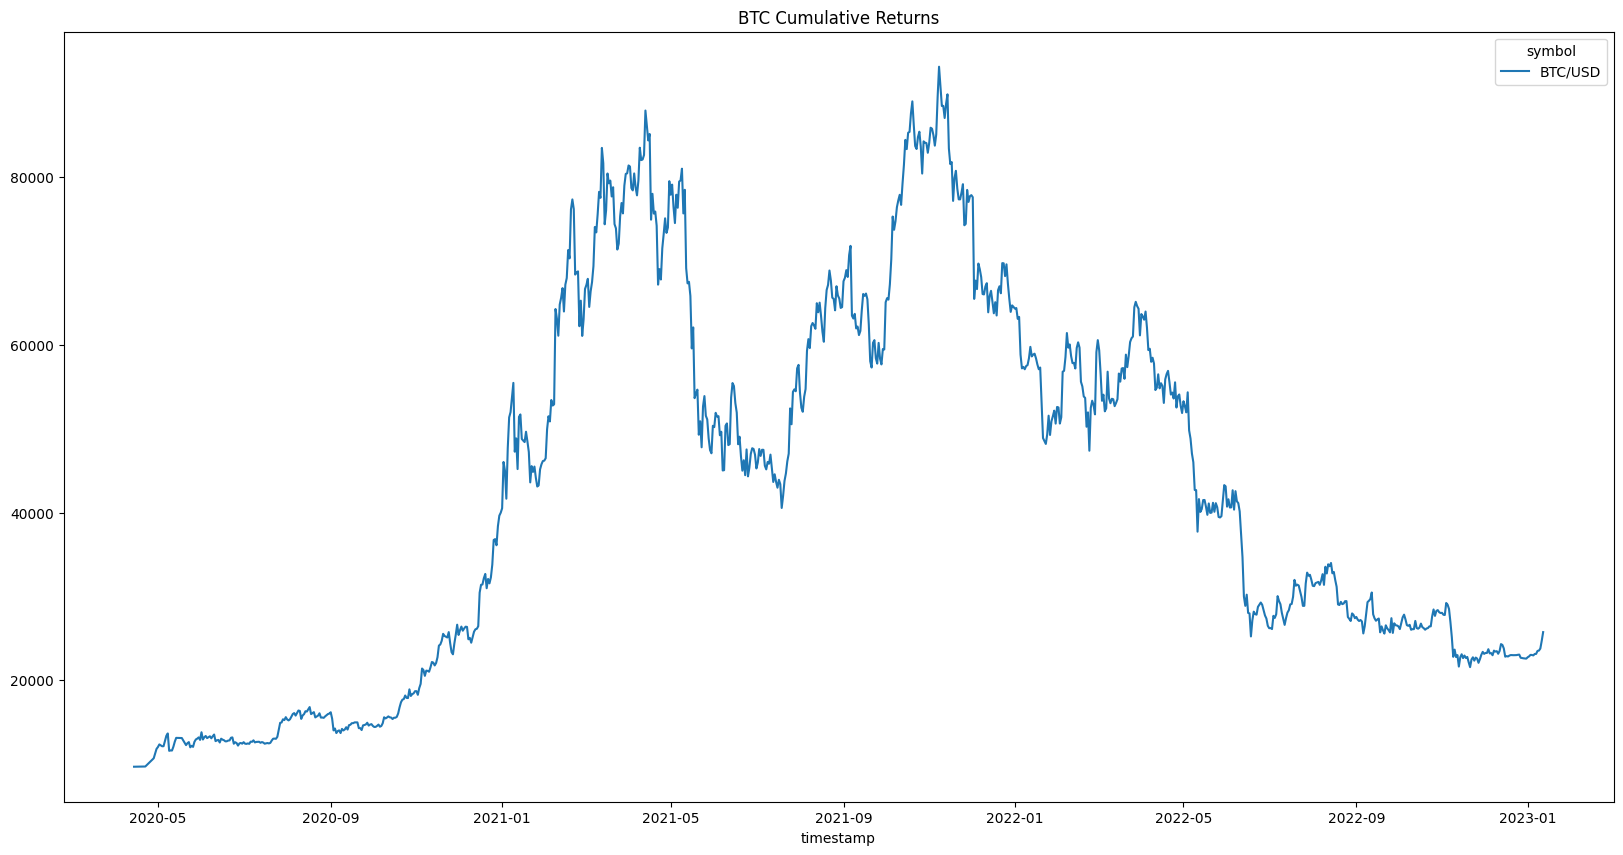

In [61]:
# Plot performance and save to Images
import matplotlib.pyplot as plt
btc_profit.plot(figsize=(20,10), legend=True, title="BTC Cumulative Returns - April 2020 to Present");
plt.savefig("Images/BTCCumulativeReturns.png")

In [62]:
# Running cumulative return against initial investment to obtain current market value of investment in SPY
spy_profit = initial_investment * SPY_cumprod
spy_profit

symbol,SPY
timestamp,
2020-04-09,10154.014599
2020-04-13,10059.489051
2020-04-14,10357.664234
2020-04-15,10136.861314
2020-04-16,10181.021898
...,...
2023-01-06,14163.503650
2023-01-09,14155.474453
2023-01-10,14254.744526


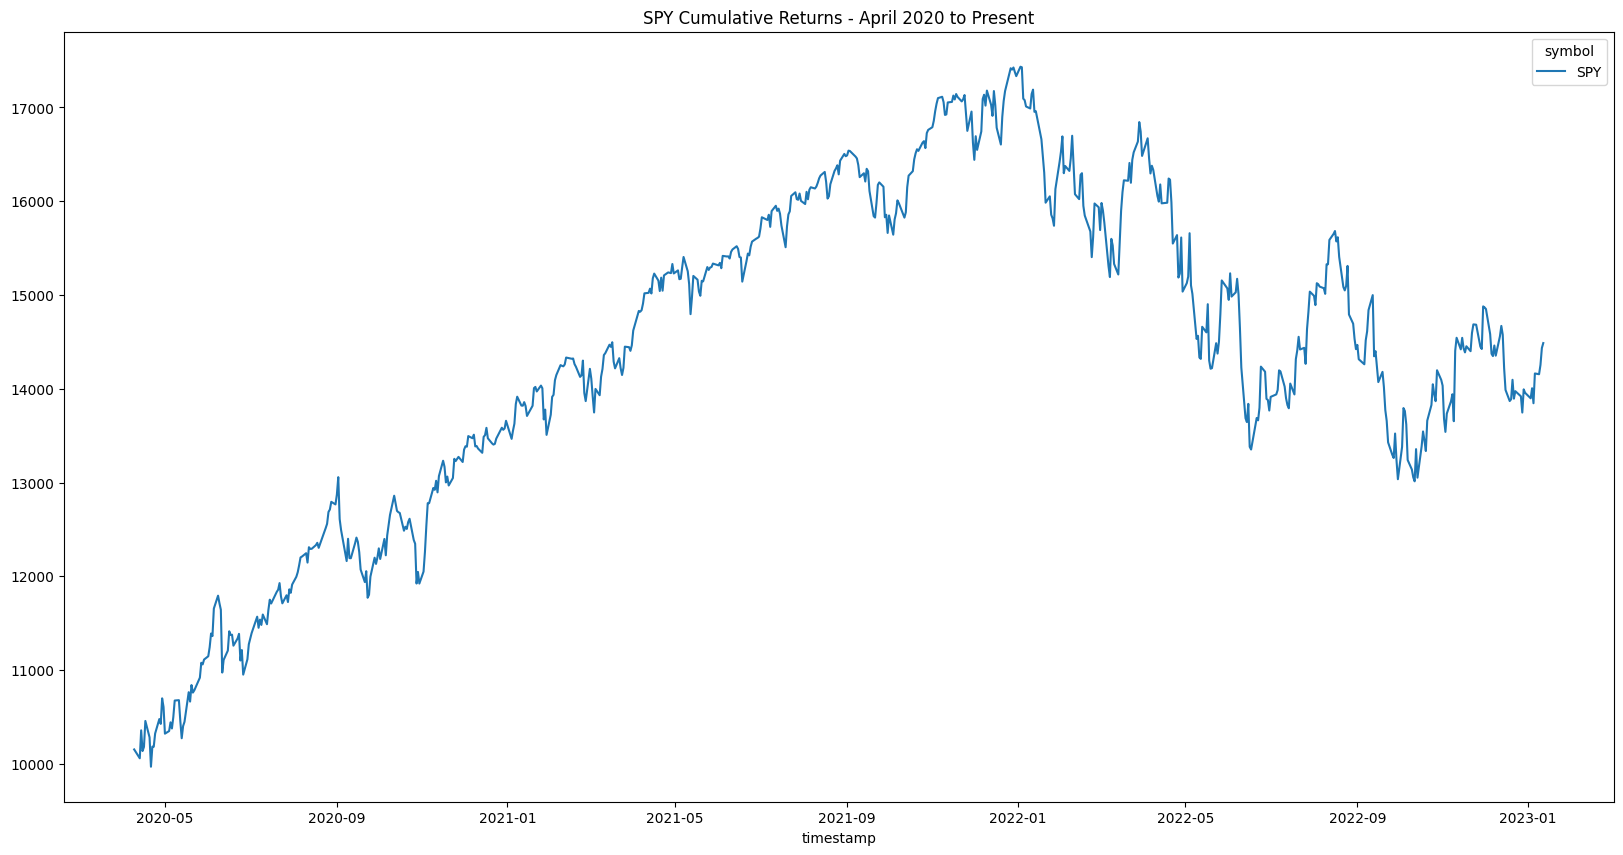

In [64]:
# Plot performance and save to Images
spy_profit.plot(figsize=(20,10), legend=True, title="SPY Cumulative Returns - April 2020 to Present");
plt.savefig("Images/SPYCumulativeReturns.png")